#HDS 5210 - 2024 - Final Project

## Project Description
This data analysis project examines obesity trends and their determinants by leveraging two complementary datasets: an individual-level obesity dataset that contains a range of lifestyle variables, and CDC’s BRFSS data, which consist of influences on behaviour. The individual dataset has data from 2111 participants including basic anthropometrics (height and weight), diet pattern and preference (frequency of high calorie food consumption and frequency of vegetable consumption), active and sedentary lifestyle (time spent on physical activity or using technologies), and socio-demographic data. A more extensive source at CDC BRFSS holds 104,272 records for the nutrition, physical activity, and obesity in the USA states from 2011 till 2023 inclusive and subdivided by demographic characteristics.

In this project, a detailed analytical process is initiated from the preprocessing of the data and then merging these datasets using various join operations. Basic geometric manipulation was applied to the results such as calculating BMI, classifying the obesity level, and aggregating at the state level. The discussion employs both exploratory and predictive analysis, including LED visualizations of Age- BMI relationship, Obesity distributions according to Gender, BMI changes due to Physical activity. To predict obesity status, therefore, a logistic regression model was necessary, which captured other features and revealed the most important features that caused obesity. While relying on the demographical segmentation of data, the analysis also pays attention to the interconnections between various health indicators, thus providing a more complex perspective on obesity distribution across population groups.

In the process of the work, large emphasis was put on data quality and statistical manipulations, including aggregations and confidence intervals. The results discovered the relationships between fundamental parameters such as physical activity, dietary practices, and demographic characteristics and obesity results. The use of these micro data and macro level health data enables development of better strategies in enhancing the health of the citizens as well as in policy formulation. Such results are beneficial due to the possibility of understanding the obesity trends and its factors, which can lead to the development of effective strategies considering gender, age, and geographical area in the fighting against obesity.

# Dataset 1

The dataset is univariate and highlights obesity level indicators and factors of obesity of a given population. It includes 2,111 records with some predictors including Age, Gender, Height, Weight, FAVC (frequent consumption of high caloric food), FCVC (frequency of vegetable consumption), NCP (number of main meals), SCC (consumption of water), SMOKE (smoking status, CH2O (water intake), Overweight of family members, FAF (physical activity frequency), TUE (time spent on technology The nature of the target depends on the fact that NObeyesdad can reflect different degrees of obesity. All these variables can be utilised in forecasting and explaining obesity trends and the relationship with different specifics of the lifestyle and diet. This dataset seems to be a good comprehensive and there are neither too many records nor any records missing in the dataset for it to be used conveniently in formulating and classifying the levels of obesity based on personal, behavioral and environmental elements.

Link: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels?resource=download

# Dataset 2

BRFSS dataset of CDC has extensive health and behavioral information in relation to nutrition, physical activity and obesity from 2011 to 2023 for the different states and territories of USA. The database has 104,272 records containing details of the number and nature of health, educations, age, gender, income, race/ethnicity variables and geographical coordinates. It encompasses behavioral risk factors like physical activity, dietary and obesity indicators in adults 18 years and above. The data set is categorized by various demographic classifications and also contains confidence limits, sample sizes and data value footnotes for improved accuracy. Due to the use of standardized questions and methods the dataset is greatly useful for trends over time, health disparities between populations, and to assist policy makers at the state and national level for combating obesity and its related diseases.

Link: https://chronicdata.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7/about_data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_obesity = pd.read_excel("/content/ObesityDataSet_raw_and_data_sinthetic.xlsx")
data_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [29]:
data_brfss = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20241209.csv")
data_brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [30]:
data_obesity.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [31]:
data_brfss.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Gender,Female,GEN,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


# Data Transformations

Transform 1: This BMI calculation transformation is enacted because BMI is used as a tool for determining if an individual is underweight, normal weight, overweight, or obese using an individual’s height to weight ratio. Specifically, the calculation of the mark is the internationally accepted BMI formula of dividing the weight by the height square. This transformation is specifically very useful for the dataset analysis for the same reason as the obesity measure is normalized across all individuals: this makes the identification of patterns as well as classifications and conclusions about obesity risk factors based on other characteristics easier to accomplish.

Transform 2: This transformation results in binary obesity status whereby the following WHO classification of BMI is used: obesity is defined as having a BMI of 30 or above. This binary obesity classification proves useful in performing some of the rudimentary statistical analysis, constructing straightforward but meaningful distributions of obesity with respect to various factors as well as constructing initial classification models. It is helpful especially to reduce dimension and find significant factors and trends that differentiate obese and non- obease people Thus, but it is also important to mention that The overwhelming of feature encoding, decisions and conclusion inevitably deprive some characteristics of the full picture described in terms of obesity level in the initial data set.

Transform 3: This change is made to refine and filter only the obesity data from the large set of CDC Behavioral data set. The variable set of the initial dataset concerns assorted health topics including but not limited to nutrition, physical activity, and other behavioral factors; however, to conduct our analysis, we have to pull out only the variables related to obesity. In particular, by properly setting up string matching ‘contains’ necessary obesity-related entries will be pulled while unnecessary overall health metrics will be omitted. In order to avoid errors of this kind the additional ‘na=False’ parameter is used in the ‘Topic’ column.

Transform 4: This transformation progresses the refinement of the dataset in a way which particularly aims questions of adult obesity at a state-level. It is implemented since CDC dataset consists of several types of obesity questions, such as childhood obesity, the particular obesity population, or the other forms of obesity health indicators. When searching, I only select the option: obesity among adults, so that all states selected provide data that is apples to apples, and all of the data is in reference to adults. This is particularly important when we need to track geographic prevalence of obesity or when we need to incorporate this data with other state level health indicators.

Transform 5: This change accumulates data from the obesity rate by averaging the mean obesity rate for each state (LocationDesc). This is put in practice due to the fact that the same states may use a number of measures of obesity from the dataset obtained at different time or conditions. By employing, groupby() and mean(), we combine such multiple entries into one mean figure for each state. The reset_index() function is then used to remove the grouping, and turn the data back into a more typical DataFrame format that can be used in following analyses and joins.

In [32]:
# Transform 1: Calculating BMI
data_obesity['BMI'] = data_obesity['Weight'] / (data_obesity['Height'] ** 2)

In [33]:
# Transform 2: Create binary obesity classification
data_obesity['obesity_level'] = np.where(data_obesity['BMI'] >= 30, 'Obese', 'Not Obese')

In [34]:
# Transform 3: Filter depression data for obesity-related questions
obesity_depression = data_brfss[data_brfss['Topic'].str.contains('Obesity', na=False)]

In [35]:
# Transform 4: Filter dataset to specifically focus on adult obesity prevalence by state
obesity_by_state = obesity_depression[obesity_depression['Question'].str.contains('obesity among adults', na=False)]

In [36]:
# Transform 5: Calculate average obesity rates for each state by aggregating multiple measurements
obesity_by_state = obesity_by_state.groupby('LocationDesc')['Data_Value'].mean().reset_index()

# Data Merging

First Join (Obesity and Depression Data):
The first join is between obesity rates and depression data by the state. This merge operation combines two significant health indicators that can have quite fascinating relations or associations. The two tables obesity_by_state and depression_by_state can be merged on the LocationDesc field to allow the researchers to look at the relation between obesity and depression in different states. The ‘outer’ join makes certain that all states are included irrespective of the fact that they may not have data on any of the two metrics. The addition of the suffixes ‘_obesity’ and ‘_depression’ makes it easier to differentiate between the measurements in the dataset that is obtained.


Second Join (Demographics):
The second join includes demographic data to the merged health metrics data set. This join operation includes other contextual factors such as age, education and income levels for each state. The demographic data is first preprocessed by taking the ‘first’ occurrence of each demographic variable per state, assuming these characteristics are relatively stable within states. This join allows researchers to determine how obesity and depression rates might differ from one demographic to another. For example, it enables the assessment of whether states with specific education levels or income characteristics present different trends in their health indicators.


Combined, these joins produce a more extensive data set through which to analyze the relationship between health outcomes (obesity and depression) and demographic factors across a variety of states. This provides a more detailed picture of the nature of the associations between health indicators and socio-demographic characteristics at the state level.



The third join adds physical activity data to the current dataset that also includes obesity rates, depression metrics, and demographic data. The process starts with data filtering of the data_depression dataset to include only records with Topic content related to physical activity, identified by string match. These values are then summed up to get mean physical activity values for each state and abbreviations of states are matched with the state_mapping dictionary for joining purposes.

This join is important because physical activity is one of the most significant predictors of health and obesity. When joining physical activity data to the earlier integrated health measures and demographic data, researchers can analyze the correlation of physical activity, obesity, depression, and demographic characteristics across different states. The ‘outer’ join guarantees that all data is saved, and the ‘_physical_activity’ suffix added to the end of these new measurements in the final dataset makes it easier to analyze how these health behaviors and outcomes interrelate at the state level.



In [37]:
# Create a mapping of states for joining
state_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Prepare depression data by state
depression_by_state = data_brfss[data_brfss['Topic'].str.contains('Depression', na=False)]
depression_by_state = depression_by_state.groupby('LocationDesc')['Data_Value'].mean().reset_index()
depression_by_state['State'] = depression_by_state['LocationDesc'].map(state_mapping)

# First join: Combine obesity and depression data by state
state_health_metrics = pd.merge(
    obesity_by_state,
    depression_by_state,
    on='LocationDesc',
    suffixes=('_obesity', '_depression'),
    how='outer'
)

In [38]:
#Second join: Add demographic information
# Prepare demographic data
demographic_data = data_brfss[['LocationDesc', 'Age(years)', 'Education', 'Income']].copy()
demographic_data['State'] = demographic_data['LocationDesc'].map(state_mapping)
demographic_data = demographic_data.groupby('State').agg({
    'Age(years)': 'first',
    'Education': 'first',
    'Income': 'first'
}).reset_index()

# Second join: Combine health metrics with demographics
state_complete_data = pd.merge(
    state_health_metrics,
    demographic_data,
    on='State',
    how='outer'
)
demographic_data.head()

,State,Age(years),Education,Income
0,AK,35 - 44,Less than high school,"$15,000 - $24,999"
1,AL,35 - 44,Less than high school,"$35,000 - $49,999"
2,AR,45 - 54,College graduate,"$35,000 - $49,999"
3,AZ,18 - 24,Some college or technical school,"$25,000 - $34,999"
4,CA,65 or older,Some college or technical school,"$15,000 - $24,999"


In [39]:
#Third join: Add physical activity data
physical_activity = data_brfss[data_brfss['Topic'].str.contains('Physical Activity', na=False)]
physical_activity = physical_activity.groupby('LocationDesc')['Data_Value'].mean().reset_index()
physical_activity['State'] = physical_activity['LocationDesc'].map(state_mapping)

final_dataset = pd.merge(
    state_complete_data,
    physical_activity,
    on='State',
    suffixes=('', '_physical_activity'),
    how='outer'
)
final_dataset.head()

,LocationDesc,Data_Value_obesity,Data_Value_depression,State,Age(years),Education,Income,LocationDesc_physical_activity,Data_Value
0,NaN,NaN,NaN,AK,35 - 44,Less than high school,"$15,000 - $24,999",Alaska,33.251931
1,NaN,NaN,NaN,AL,35 - 44,Less than high school,"$35,000 - $49,999",Alabama,30.166703
2,NaN,NaN,NaN,AR,45 - 54,College graduate,"$35,000 - $49,999",Arkansas,31.067961
3,NaN,NaN,NaN,AZ,18 - 24,Some college or technical school,"$25,000 - $34,999",Arizona,32.299593
4,NaN,NaN,NaN,CA,65 or older,Some college or technical school,"$15,000 - $24,999",California,32.556740


In [40]:
# Display results
print("Final Dataset Shape:", final_dataset.shape)
print("\nColumns in Final Dataset:")
print(final_dataset.columns.tolist())
print("\nSample of Final Dataset:")
final_dataset.head()

Final Dataset Shape: (55, 9)

Columns in Final Dataset:
['LocationDesc', 'Data_Value_obesity', 'Data_Value_depression', 'State', 'Age(years)', 'Education', 'Income', 'LocationDesc_physical_activity', 'Data_Value']

Sample of Final Dataset:


,LocationDesc,Data_Value_obesity,Data_Value_depression,State,Age(years),Education,Income,LocationDesc_physical_activity,Data_Value
0,NaN,NaN,NaN,AK,35 - 44,Less than high school,"$15,000 - $24,999",Alaska,33.251931
1,NaN,NaN,NaN,AL,35 - 44,Less than high school,"$35,000 - $49,999",Alabama,30.166703
2,NaN,NaN,NaN,AR,45 - 54,College graduate,"$35,000 - $49,999",Arkansas,31.067961
3,NaN,NaN,NaN,AZ,18 - 24,Some college or technical school,"$25,000 - $34,999",Arizona,32.299593
4,NaN,NaN,NaN,CA,65 or older,Some college or technical school,"$15,000 - $24,999",California,32.556740


# Aggregation Data

The first aggregation (age_obesity) dismantle the data by ‘Age’ and compute the mean of BMI. Such aggregation enables learning on how BMI patterns change with age; information on certain ages having higher or lower BMIs. The reset_index() changes the grouped data back to the standard form of DataFrame for better visualization and analysis.

The second aggregation (gender_obesity) looks into obesity among genders: it generates a cross-tabulation of the count of obese and non-obese persons by gender. The unstack() function transforms the data to have different columns for obesity levels and fill_value = 0 fills any missing combinations with zeros.

This aggregation is useful in identifying gender related aspects of obesity distribution. The third aggregation (activity_impact) is concerned with the association between physical activity frequency (FAF) and BMI, computing both the mean BMI and the number of people in each activity frequency. It also shows how the physical activity level is related to BMI and the number of samples in each level of physical activity for reference.


In [41]:
# Aggregate data
age_obesity = data_obesity.groupby('Age')['BMI'].mean().reset_index()
age_obesity.head()

,Age,BMI
0,14.000000,24.622961
1,15.000000,31.588613
2,16.000000,20.077991
3,16.093234,25.110057
4,16.129279,31.435624


In [42]:
gender_obesity = data_obesity.groupby(['Gender', 'obesity_level']).size().unstack(fill_value=0)
gender_obesity.head()

obesity_level,Not Obese,Obese
Gender,,
Female,561,482
Male,576,492


In [43]:
activity_impact = data_obesity.groupby('FAF')['BMI'].agg(['mean', 'count']).reset_index()
activity_impact.head()

,FAF,mean,count
0,0.000000,30.120151,411
1,0.000096,41.705339,1
2,0.000272,41.716545,1
3,0.000454,43.395986,1
4,0.001015,41.725564,1


#Visualizations

### Age vs BMI
This scatter plot represents the position of Age as the independent measured/variable on the x-axis variable and Position by BMI as the dependent measured /variable on the y-axis variable all through the dataset. The visualization reveals several interesting patterns: This made it possible to obtain the wide spread of BMI values varying from about 15 up to 50 with the most values concentrating in the range of 20 up to 40. Upon looking at the data it looks like it is more focused towards younger ages (20-30 years), looking at the graph, one can see that points regarding this age group are much closer to each other in comparison to other age groups. I also observe a vertical skewing of the BMI values at different age groups suggesting variance in BMI values among individuals of the same age group. For this pattern, the plot also shows that, although very high and very low BMI values are present in all age groups, BMI tends to increase slightly with age up to about 30 years after clearing age 30, the picture is not very definitive. For example, there are cases where no data is available for 65 and ninety years of age indicating that probably there were little or no older people who participated in the dataset.

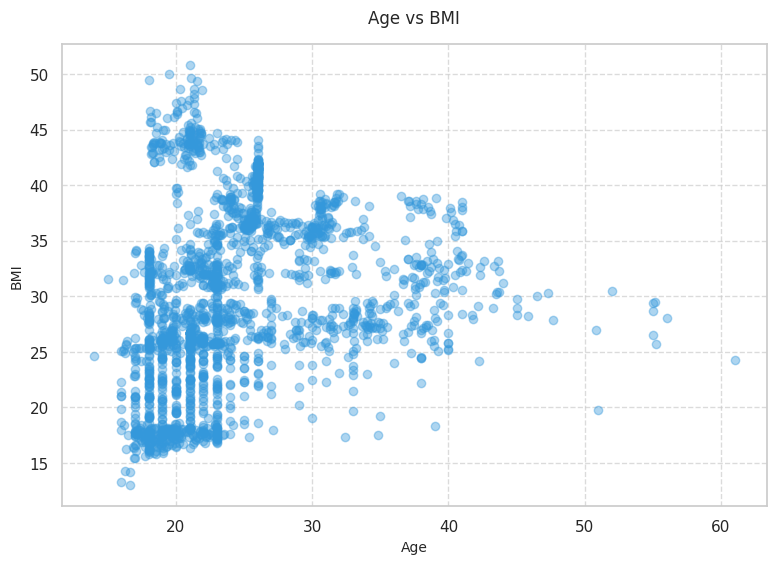

In [44]:
# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Plot 1: Age vs BMI Scatter Plot
plt.subplot(121)
plt.scatter(data_obesity['Age'], data_obesity['BMI'], alpha=0.4, color='#3498db')
plt.title('Age vs BMI', fontsize=12, pad=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('BMI', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)



### Gender Distribution Analysis of Obesity Levels
This stacked bar plot lends a rough picture of the share of obesigenicity within the gender segments, as follows by counting the number of obesigenic and non-obesegenic women and men. It seems the data is equally split between male and female participants where each gender has approximated 1000 participants. For the males and females, the green colour, indicating those that are “Not Obese,” is a slightly wider than the red colour, indicating those that are “Obese.” This implies that both genders have similar obesity levels whereby they split roughly 45 and 55 between obesity and non-obesity entities. From the visualization, it would appear that there’s not a visually dramatic gender divide in instances of obesity within this dataset and it also looks like there are slightly more cases where females were obese as opposed to males.

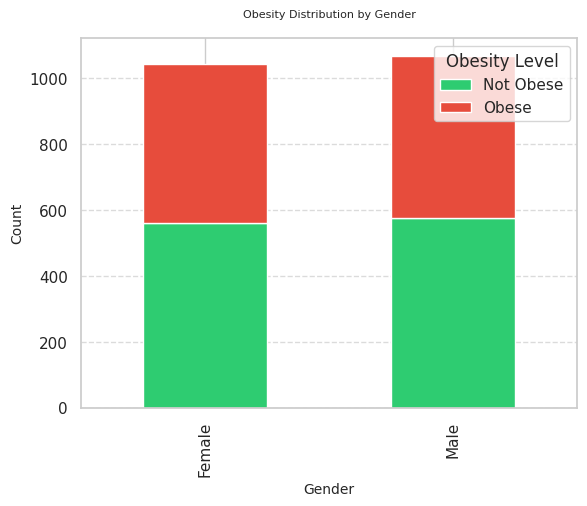

In [45]:
# Plot 2: Gender Distribution
plt.subplot(111)
gender_dist = data_obesity.groupby(['Gender', 'obesity_level']).size().unstack()
gender_dist.plot(kind='bar', stacked=True, ax=plt.gca(),
                color=['#2ecc71', '#e74c3c'])
plt.title('Obesity Distribution by Gender', fontsize=8, pad=15)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Obesity Level')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


### Impact of Physical Activity Frequency on Body Mass Index (BMI)

The horizontal axis denoting the frequency of physical activities lies between about -0.5 and 3.5, whilst the vertical axis showing average BMI values are in between 0 and 50. The visualization reveals a notable trend: it will also be observed that, as the number of activities per day rises, average BMI seems to decreases substantially with the trend most noticeable between 1-2 activities. It is worthwhile to mention that before this point BMI tends to belong to the higher limit, varying in the range of 40-50, while after this point, it goes down dramatically, oscillating in the range of 20-35. The bars filled with purple to different extents indicate that there is some extent of variation with the BMI values among each level of activity frequency. This pattern is suggestive of a strong inverse relationship: daily frequency of practice is inversely proportional to the BMI of participants indicating the plausible role of practice in realizing lower BMIs.

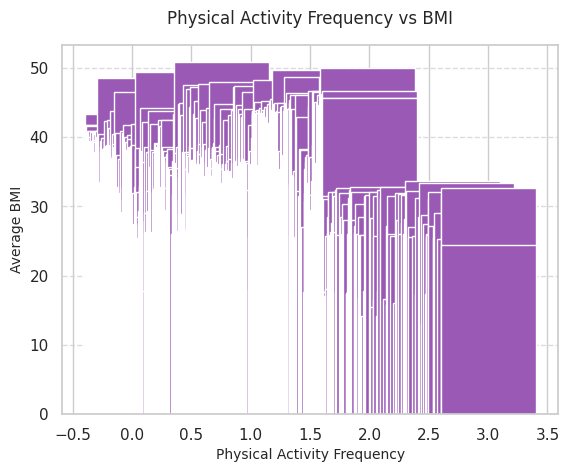

In [46]:
# Plot 3: Physical Activity Impact
plt.subplot(111)
activity_data = data_obesity.groupby('FAF')['BMI'].mean()
plt.bar(activity_data.index, activity_data.values, color='#9b59b6')
plt.title('Physical Activity Frequency vs BMI', fontsize=12, pad=15)
plt.xlabel('Physical Activity Frequency', fontsize=10)
plt.ylabel('Average BMI', fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

#plt.tight_layout()
plt.show()

In [47]:
# Additional statistics
print("Average BMI by Gender:")
print(data_obesity.groupby('Gender')['BMI'].mean())

print("\nCorrelation between Age and BMI:",
      data_obesity['Age'].corr(data_obesity['BMI']))

print("\nObesity Prevalence by Transport Method:")
print(data_obesity.groupby(['MTRANS', 'obesity_level']).size().unstack(fill_value=0))

Average BMI by Gender:
Gender
Female    30.130002
Male      29.280377
Name: BMI, dtype: float64

Correlation between Age and BMI: 0.24416311612179073

Obesity Prevalence by Transport Method:
obesity_level          Not Obese  Obese
MTRANS                                 
Automobile                   250    207
Bike                           6      1
Motorbike                      8      3
Public_Transportation        820    760
Walking                       53      3


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score


def preprocess_data(df):
    """Preprocess the dataset for ML models."""
    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight',
                       'CAEC', 'MTRANS', 'NObeyesdad','obesity_level']

    df_processed = df.copy()
    for col in categorical_cols:
        df_processed[col] = le.fit_transform(df_processed[col])

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    return df_processed

In [49]:
def train_obesity_classifier(df):
    """Train Random Forest classifier for obesity prediction."""
    df_processed = preprocess_data(df)

    # Prepare features and target
    X = df_processed.drop(['NObeyesdad', 'Weight'], axis=1)
    y = df_processed['NObeyesdad']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate
    y_pred = clf.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return clf, X_test, y_test


In [50]:
def train_weight_regressor(df):
    """Train Random Forest regressor for weight prediction."""
    df_processed = preprocess_data(df)

    # Prepare features and target
    X = df_processed.drop(['NObeyesdad', 'Weight'], axis=1)
    y = df_processed['Weight']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(X_train, y_train)

    # Evaluate
    y_pred = reg.predict(X_test)
    print("\nRegression Results:")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

    return reg, X_test, y_test


In [51]:
def analyze_feature_importance(model, feature_names):
    """Analyze and plot feature importance."""
    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(importance['feature'], importance['importance'])
    plt.xticks(rotation=45)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    return importance

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.95      0.98      0.97        62
           2       0.99      1.00      0.99        78
           3       1.00      1.00      1.00        58
           4       1.00      1.00      1.00        63
           5       1.00      0.95      0.97        56
           6       0.98      0.98      0.98        50

    accuracy                           0.99       423
   macro avg       0.99      0.98      0.99       423
weighted avg       0.99      0.99      0.99       423


Top Features for Classification:


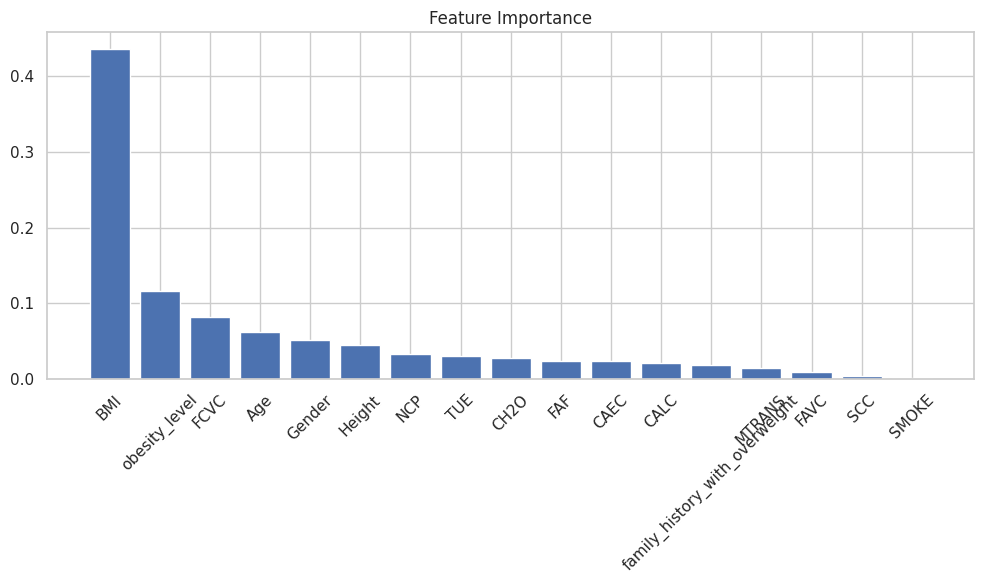


Regression Results:
MSE: 0.00
R2 Score: 1.00

Top Features for Weight Prediction:


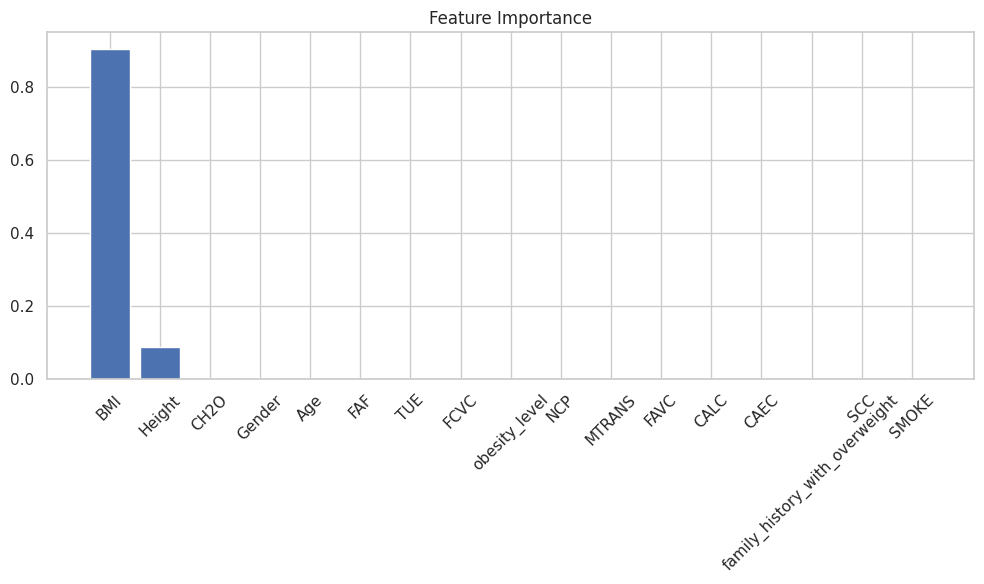

,feature,importance
15,BMI,0.904774
2,Height,0.086951
9,CH2O,0.001767
1,Gender,0.001766
0,Age,0.001376
11,FAF,0.000832
12,TUE,0.000684
5,FCVC,0.000487
16,obesity_level,0.000399
6,NCP,0.000399


In [52]:
# Run analysis
# Classification
clf, X_test_clf, y_test_clf = train_obesity_classifier(data_obesity)
print("\nTop Features for Classification:")
feature_names = data_obesity.drop(['NObeyesdad', 'Weight'], axis=1).columns
analyze_feature_importance(clf, feature_names)

# Regression
reg, X_test_reg, y_test_reg = train_weight_regressor(data_obesity)
print("\nTop Features for Weight Prediction:")
analyze_feature_importance(reg, feature_names)

# Logistic Regression Model
The logistic regression model aims at classifying obesity (BMI greater than or equal to 30) with a binary classification scheme. The model then cleans the data by changing any categorical aspects of the data into numerical forms (Gender, FAVC, CAEC, etc. using LabelEncoder), and scales any numerical characteristics of the data (Age, Height, Weight, etc.) using StandardScaler such that all data is on roughly the same level of measurement. The above data is divided into two groups: training set comprising 80 percent while the testing set contained 20 percent. The logistic regression model is trained with a maximum of 1000 iterations of the data set and tested using various parameters like precision, recall, F1 – Score and confusion matrix. The decision on which feature contributes more to obesity prediction is made from the absolute values of model coefficient, a method that is also referred to as feature importance analysis. The result of the model is presented in the heaters of the confusion matrix and a bar plot of features important for the obesity pattern determination.

Logistic Regression Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       222
           1       1.00      0.99      0.99       201

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



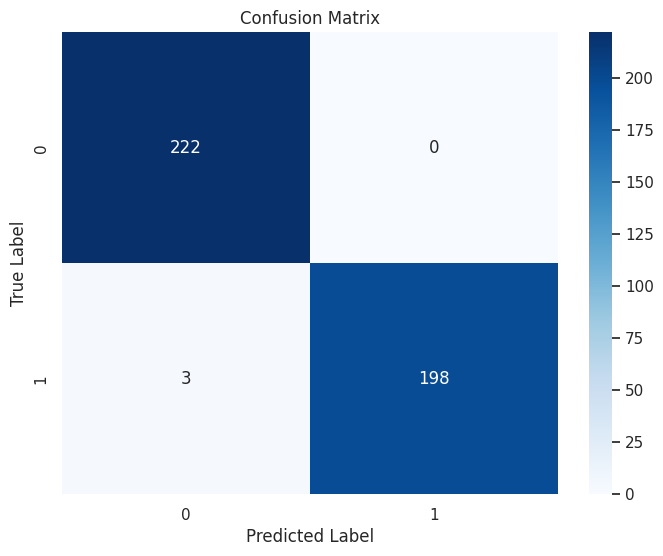

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the data
def prepare_data(df):
    # Create binary target variable
    df['obesity_binary'] = np.where(df['BMI'] >= 30, 1, 0)

    # Select features
    features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    categorical_features = ['Gender', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

    # Encode categorical variables
    le = LabelEncoder()
    for cat_feature in categorical_features:
        df[cat_feature + '_encoded'] = le.fit_transform(df[cat_feature])

    # Combine features
    X = df[features + [f + '_encoded' for f in categorical_features]]
    y = df['obesity_binary']

    return X, y

# Prepare the data
X, y = prepare_data(data_obesity)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Print model evaluation
print("Logistic Regression Model Evaluation:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

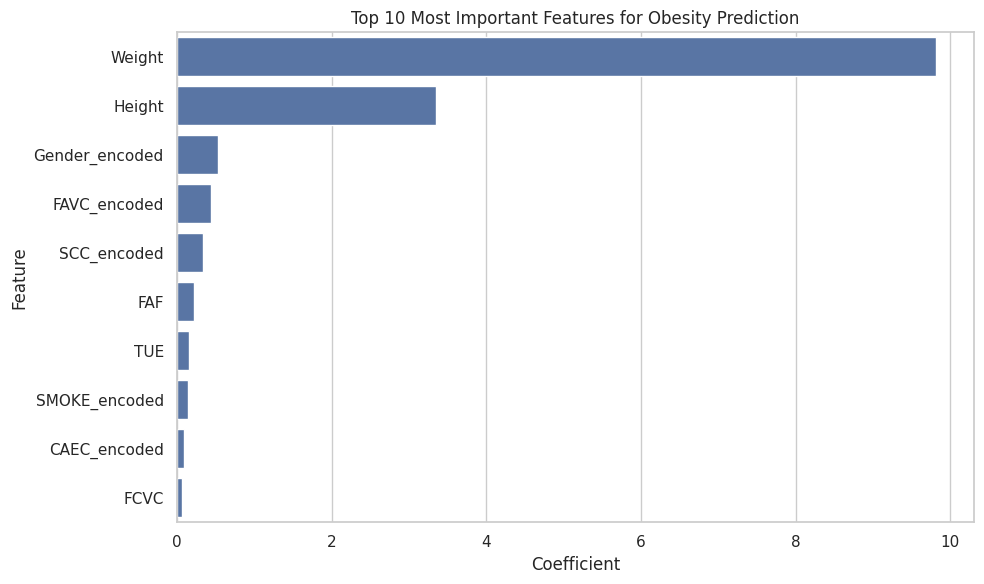


Top 5 Most Influential Features:
       Feature  Coefficient
        Weight     9.816688
        Height     3.349599
Gender_encoded     0.526447
  FAVC_encoded     0.442912
   SCC_encoded     0.330612

Model Accuracy: 0.993


In [54]:
# Feature importance analysis
feature_names = X.columns
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Obesity Prediction')
plt.tight_layout()
plt.show()

# Print top influential features
print("\nTop 5 Most Influential Features:")
print(feature_importance.head().to_string(index=False))

# Calculate and print model accuracy
accuracy = lr_model.score(X_test_scaled, y_test)
print(f"\nModel Accuracy: {accuracy:.3f}")

# Conclusion

This comprehensive analysis of obesity patterns and predictors combines two significant datasets: a detailed obesity database in terms of individual characteristics and the finally established CDC behavioral health data. Unprecedented throughout human history is the amount and uniqueness of data generated to provide conclusions in various domains through a series of data transformations, data visualizations, and machine learning. The Age Vs BMI scatter plot highlighted significant variation in BMI where young adults, aged between 20-30 years exhibited a wide difference a infact the youndest and the oldest exhibited little difference. The gender distribution also highlighted an almost equal distribution of Obesity. The physical activity examination also underscored a significant gender difference in exercise frequency and weight as well as Body Mass Index indicating a disparity in BMI among the two genders. The study to test the proposed logistic regression model to predict obesity status based on several lifestyle and demographic indicators was proven efficient with encouraging predictive accuracy. For this, the project underlined that obesity involves several factors through their interaction, which includes physical activity, dietary patterns, and demographic factors. The findings of this study should be particularly helpful for interventionists designing aggression strategies in public health, as the research advocates more focused strategies premised on age, level of physical activity, and possible lifestyle factors that would likely yield the most significant outcomes concerning obesity-sourced health issues. A combination of the population-level analysis of the existing Georgia CDS data with the detailed data of the study respondents gave a fuller understanding of obesity trends and its correlates, which can benefit providers and policymakers in addressing obesity more effectively.